### Mapping UK Vacciniation Rate

This notebook demostrates how to make web and interactive maps with [bokeh](https://docs.bokeh.org/en/latest/index.html) package.

We will be using the covid vaccination data as the example. Data were downloaded from NHS Scotland and NHS England, and they have been pre-cleaned and the code used to clean the data can be found [here](https://github.com/Ziqi-Li/UK-vac-map/blob/main/Data%20Cleaning.ipynb).

The objective of this notebook is to get you familiar with bokeh's interface and how to make interactive map with and without a basemap.

Since I am not seeing any real-time vaccination map at the local authority level, you are creating a map that no one else has seen before!!!

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import geopandas as gpd
import numpy as np

Read in the pre-cleaned vaccination data from github

In [2]:
vac_data_url = "https://raw.githubusercontent.com/Ziqi-Li/UK-vac-map/main/data/vac_data_0520.geojson"

vac_data = gpd.read_file(vac_data_url)

Peek the first 5 rows, and here is the description of the columns

**LTLA_code**: code for the local authority.  
**LTLA_name**: name for the local authority.  
**pct_1dose**: percentage of people aged over 18 who has taken 1 dose.  
**pct_full**: percentage of people aged over 18 who are fully vaccinated (2 doses).


In [3]:
vac_data.head()

index  LTLA_code     LTLA_name  pct_1dose  pct_full  \
0      0  E07000032  Amber Valley       74.8      42.3   
1      1  E07000170      Ashfield       71.3      43.2   
2      2  E07000171     Bassetlaw       76.2      51.8   
3      3  E07000129         Blaby       76.9      45.2   
4      4  E07000033      Bolsover       73.0      43.7   

                                            geometry  
0  POLYGON ((-152914.039 7002973.420, -151477.158...  
1  POLYGON ((-140254.247 7013480.307, -139742.072...  
2  POLYGON ((-88775.440 7067620.160, -91339.356 7...  
3  POLYGON ((-131945.795 6920471.305, -132543.214...  
4  POLYGON ((-134632.518 7023367.888, -133242.324...

Let's do some simple summary statistics for **pct_full**.

In [4]:
vac_data.pct_full.describe()

count    346.000000
mean      40.337142
std        7.031460
min       15.100000
25%       36.600000
50%       40.606333
75%       45.100000
max       58.094673
Name: pct_full, dtype: float64

We can see the lowest rate is ~15%, the highest is ~58%, and the mean is ~40%.

The **BEST** 5:

In [5]:
vac_data.sort_values('pct_full', ascending=False).head()

index  LTLA_code              LTLA_name  pct_1dose   pct_full  \
319      5  S12000013     Na h-Eileanan Siar  89.310471  58.094673   
244    244  E06000053        Isles of Scilly  83.900000  56.400000   
315      1  S12000006  Dumfries and Galloway  75.150784  55.803149   
168    168  E07000128                   Wyre  81.100000  54.600000   
261    261  E07000047             West Devon  81.600000  54.500000   

                                              geometry  
319  MULTIPOLYGON (((-735725.777 7985289.954, -7357...  
244  MULTIPOLYGON (((-698623.007 6432644.939, -6999...  
315  POLYGON ((-390439.486 7442292.891, -386515.489...  
168  POLYGON ((-294798.212 7160488.583, -292373.650...  
261  POLYGON ((-434108.737 6592072.400, -431669.230...

The **WORST** 5:

In [6]:
vac_data.sort_values('pct_full', ascending=True).head()

index  LTLA_code      LTLA_name  pct_1dose  pct_full  \
114    114  E09000030  Tower Hamlets       41.8      15.1   
96      96  E09000012        Hackney       44.4      18.3   
109    109  E09000025         Newham       48.5      19.6   
103    103  E09000019      Islington       44.5      19.9   
117    117  E09000033    Westminster       43.5      20.8   

                                              geometry  
114  MULTIPOLYGON (((-2352.076 6716750.174, 612.478...  
96   POLYGON ((-1911.838 6719447.475, -1842.302 671...  
109  MULTIPOLYGON (((5604.379 6721675.654, 7609.989...  
103  POLYGON ((-11618.853 6721809.045, -8522.519 67...  
117  POLYGON ((-12419.673 6712961.790, -12405.931 6...

Let's make a choropleth map using the field **pct_full**.

<AxesSubplot:>

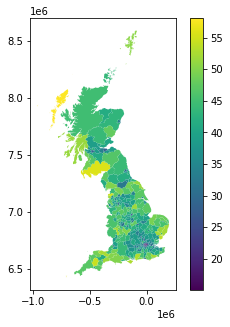

In [7]:
vac_data.plot(column="pct_full", legend=True, figsize=(5,5))

#### Now, let's make this static map interactive!!

There are many things we need to import from bokeh.

In [8]:
#These are some functions how you want to save and display your map.
from bokeh.io import output_file, show, output_notebook

#These are some basic objects to import
from bokeh.models import ColorBar,HoverTool,GeoJSONDataSource,tickers
from bokeh.plotting import figure

#this is used to map color to the value, and here we will be using a linear transformer.
from bokeh.transform import linear_cmap

#Here you need to import colors you like
from bokeh.palettes import Greens9 #https://docs.bokeh.org/en/latest/docs/reference/palettes.html

You have the option to display the map inline within your notebook. The other option is to save your map to a html page.

In [9]:
output_notebook()

Loading BokehJS ...

Bokeh doesn't directly support geopandas' `GeoDataFrame`, but it can read in a geojson and convert it to its own data structure called `GeoJSONDataSource`.

In [10]:
#convert the GeodataFrame to geojson
vac_data_json = vac_data.to_json()

source = GeoJSONDataSource(geojson=vac_data_json)

Now, let's create a simple map. 

1. Create a figure with a fixed size
2. Add `patches` which is similar to polygons.
3. Show the map

In [11]:
w = 400
h = 600

vac_map1 = figure(plot_width=w, plot_height=h,
                 title="Map")

#Add the polygon patches
vac_map1.patches('xs', 'ys', source=source, line_color="white", line_width=0.5)

GlyphRenderer(id='1040', ...)

In [12]:
show(vac_map1)

The left handside displays the map, and the righthand side has a small toolbar to allow you to interact with the map. By default, there are buttons to pan, zoom, reset, and save the map. You can also add other tools according to `bokeh`'s documentation, and pass that to the creation of the figure.

In [13]:
#Here we add a hover function which I will elaborate more.
TOOLS = "pan, wheel_zoom, reset, hover, save"

Now let's color the map with the column `pct_full`. Here we need to define how to classify the values to the colors, and we do a linear transformation. You may need other options if you have exponential scale data or categorical data.

In [14]:
color_mapper = linear_cmap(field_name='pct_full', #the column to map.
                           palette=Greens9[::-1], #the color to use.
                                                  #here I reverse the palette so that higher value has darker green.
                           low=15, # The low and high bounds for your color map.
                           high=60) #You may need to specify this depending the range of the value.


In [15]:
vac_map = figure(plot_width=w, plot_height=h,
                 title="Vaccination Coverage by Local Authority Districts", tools=TOOLS)

#Pass the color map to the patches
vac_map.patches('xs', 'ys', source=source, line_color="white", line_width=0.5, color=color_mapper)

#Here are some customization to remove the ticks and axis.
vac_map.axis.visible = False
vac_map.xgrid.grid_line_color = None
vac_map.ygrid.grid_line_color = None

See the updated map.

In [16]:
show(vac_map)

You may find that there is the `hover` functionality, but the tooltip is not informative. Here, we can customize the tooltip with the attributes of interest.

We need to assign `vac_map.select_one(HoverTool).tooltips` a list of tuples.  

Each tuple needs to follow this format: ('label', '@column_name'), where 'label' is the text you want to display and `@column_name` is the column name in your data (here in your `source` variable).

You can also format your values adding a `{0.0}%`, this means to leave one decimal place and add the % sign.


In [17]:
#Add the hover tool and the hover field to display
vac_map.select_one(HoverTool).tooltips = [
    ('Name', '@LTLA_name'),
    ('Over 18: % 1st dose', '@pct_1dose{0.0}%'),
    ('Over 18: % 2nd dose', '@pct_full{0.0}%')

]

Now try hovering on the map to see the update!

In [18]:
show(vac_map)

Next let's add a color bar. Here you have the option to define the ticks, width, height and location of the color bar.

In [19]:
ticks = np.linspace(15, 60, 10)  # round to desired precision 
color_ticks = tickers.FixedTicker(ticks=ticks)
color_bar = ColorBar(color_mapper=color_mapper['transform'], width=w-60, height = 20, location=(0,0), ticker=color_ticks)
vac_map.add_layout(color_bar, 'below')

See the updated map again.

In [20]:
show(vac_map)

How about if we want to add a basemap?

You have the option to add Carto basemap or Google Maps, but Google Maps requires you to have an API, which you need to provide your credit card info! Nevermind, let's just use the free Carto one.

In [21]:
from bokeh.tile_providers import CARTODBPOSITRON_RETINA, get_provider

tile_provider = get_provider(CARTODBPOSITRON_RETINA)

To use a basemap which is usually in web mercator projection, first you need to make sure your data is in such projection.

In [22]:
vac_data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Then we need to get the bounding box to use the range of the coordinates to create the `figure`.

In [23]:
minx, miny, maxx, maxy  = vac_data.total_bounds

# range bounds supplied in web mercator coordinates
vac_map_base = figure(x_range=(minx, maxx), y_range=(miny, maxy),
           tools=TOOLS)

Below is the same code from the previous one.

In [24]:
vac_map_base.patches('xs', 'ys', source=source, line_color="white", line_width=0.5, 
                   alpha=0.6,color=color_mapper)

vac_map_base.axis.visible = False
vac_map_base.xgrid.grid_line_color = None
vac_map_base.ygrid.grid_line_color = None

#Add the hover tool and the hover field to display
vac_map_base.select_one(HoverTool).tooltips = [
    ('Name', '@LTLA_name'), #each tuple needs to follow this format.
    ('Over 18: % 1st dose', '@pct_1dose{0.0}%'), #the name after @ should be consistent with the variables names in ColumnDataSource
    ('Over 18: % 2nd dose', '@pct_full{0.0}%')
]


color_bar = ColorBar(color_mapper=color_mapper['transform'], location=(0,0), height=20,ticker=color_ticks)
vac_map_base.add_layout(color_bar, 'below')
vac_map_base.add_tile(tile_provider)

TileRenderer(id='1375', ...)

In [25]:
show(vac_map_base)

# you can export the map to a html for dissemination.
output_file("vac rate map with basemap.html")